In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
import warnings
import plotly.express as px 
from plotly.offline import iplot
warnings.filterwarnings('ignore')
%matplotlib inline

## LOADING IN THE DATA

In [2]:
# Loading the zomato dataset
df1 = pd.read_csv('zomato.csv', encoding = 'latin-1')
df1

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [3]:
# Columns of df Dataframe
df1.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [4]:
# info about df
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
# Description of df's columns with numeric columns
df1.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [6]:
# Description of df's columns with object datatype columns
df1.describe(include = 'object')

,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Rating color,Rating text
count,9551,9551,9551,9551,9551,9542,9551,9551,9551,9551,9551,9551,9551
unique,7446,141,8918,1208,1265,1825,12,2,2,2,1,6,6
top,Cafe Coffee Day,New Delhi,"Dilli Haat, INA, New Delhi",Connaught Place,"Connaught Place, New Delhi",North Indian,Indian Rupees(Rs.),No,No,No,No,Orange,Average
freq,83,5473,11,122,122,936,8652,8393,7100,9517,9551,3737,3737


In [7]:
# Dropping the columns - Latitude, Longitude (As we already know the locations of the restaurants)
# Dropping the column - Locality Verbose (As we already have the Locality, and City segregated into different columns)
df1.drop(columns = ['Locality Verbose', 'Latitude', 'Longitude'], inplace = True)

In [8]:
# Loading the COuntry Dataset
df_country = pd.read_excel('Country-Code.xlsx')
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [9]:
# Merging the two dataframes - df1 and df_country to get the resultant dataframe with Country column
df = pd.merge(df1, df_country, on = 'Country Code', how = 'left')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City",Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


## The top 5 countries which have the most no. of orders

In [10]:
country = df['Country'].value_counts()
country

Country
India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: count, dtype: int64

In [11]:
# Storing the names of the Coutnries
country_names = df['Country'].value_counts().index
country_names

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object', name='Country')

In [12]:
# Storing the no. of orders from each country
country_val = df['Country'].value_counts().values
country_val

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4], dtype=int64)

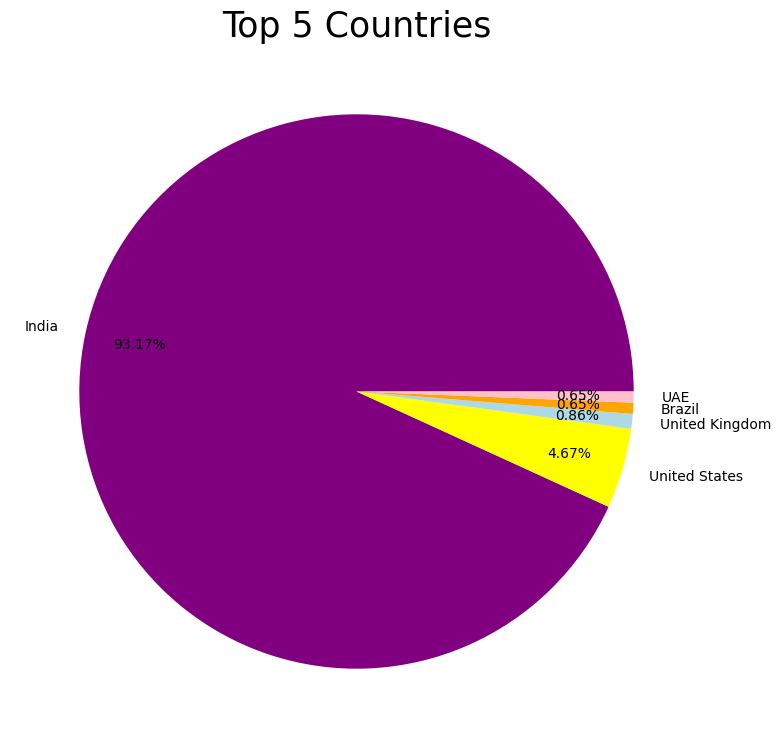

In [13]:
plt.figure(figsize = (9,9))
color = [ 'purple', 'yellow', 'lightblue', 'orange', 'pink']
plt.pie(x = country_val[:5], labels = country_names[:5], autopct = '%1.2f%%', pctdistance = 0.8, colors = color)
plt.title('Top 5 Countries', fontsize = 25)
plt.show()

Observation:- The top 5 countries where the maximum orders were placed
1. India --> 93.17%
2. United States --> 4.67%
3. United Kingdom --> 0.86%
4. Brazil --> 0.65%
5. United Arab Emirates --> 0.65%

Although Zomato is an Indian company that operates in 24 countries, India is still its largest market, with Zomato being one of the biggest household names in India.

## The top 5 Cities in India which have the most no. of orders.

In [14]:
# Dataframe with records of India
df[df['Country'] == 'India']

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"North Indian, Mughlai",850,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140,India
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"North Indian, Mughlai",700,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71,India
626,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,North Indian,500,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94,India
627,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,Rajasthani,400,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87,India
628,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"North Indian, Chinese, Mughlai",1000,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9271,2800100,D Cabana,1,Vizag,"Beach Road, Near Bus Stop, Sagar Nagar, Visakh...",Sagar Nagar,"Continental, Seafood, Chinese, North Indian, B...",600,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,193,India
9272,2800418,Kaloreez,1,Vizag,"Plot 95, Opposite St. Lukes Nursing School, Da...",Siripuram,"Cafe, North Indian, Chinese",400,Indian Rupees(Rs.),No,No,No,No,2,3.7,Yellow,Good,85,India
9273,2800881,Plot 17,1,Vizag,"Plot 17, Gangapur Layout, Siripuram, Vizag",Siripuram,"Burger, Pizza, Biryani",600,Indian Rupees(Rs.),No,No,No,No,2,4.3,Green,Very Good,172,India
9274,2800042,Vista - The Park,1,Vizag,"The Park, Beach Road, Pedda Waltair, Lawsons B...","The Park, Lawsons Bay","American, North Indian, Thai, Continental",1500,Indian Rupees(Rs.),No,No,No,No,4,3.8,Yellow,Good,74,India


In [15]:
indian_cities = df[df['Country'] == 'India'].City.value_counts()
indian_cities

City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Ahmedabad         21
Guwahati          21
Lucknow           21
Bhubaneshwar      21
Amritsar          21
Pune              20
Puducherry        20
Patna             20
Ludhiana          20
Ranchi            20
Surat             20
Vadodara          20
Nashik            20
Nagpur            20
Mysore            20
Mumbai            20
Varanasi          20
Mangalore         20
Agra              20
Kochi             20
Kolkata           20
Dehradun          20
Allahabad         20
Aurangabad        20
Bangalore         20
Bhopal            20
Chennai           20
Coimbatore        20
Goa               20
Indore            20
Jaipur            20
Kanpur            20
Vizag             20
Chandigarh        18
Hyderabad         18
Secunderabad       2
Panchkula          1
Mohali             1
Name: count, dtype: int64

In [16]:
# Storing the names of Cities
city_names = indian_cities.index
city_names

Index(['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad', 'Ahmedabad',
       'Guwahati', 'Lucknow', 'Bhubaneshwar', 'Amritsar', 'Pune', 'Puducherry',
       'Patna', 'Ludhiana', 'Ranchi', 'Surat', 'Vadodara', 'Nashik', 'Nagpur',
       'Mysore', 'Mumbai', 'Varanasi', 'Mangalore', 'Agra', 'Kochi', 'Kolkata',
       'Dehradun', 'Allahabad', 'Aurangabad', 'Bangalore', 'Bhopal', 'Chennai',
       'Coimbatore', 'Goa', 'Indore', 'Jaipur', 'Kanpur', 'Vizag',
       'Chandigarh', 'Hyderabad', 'Secunderabad', 'Panchkula', 'Mohali'],
      dtype='object', name='City')

In [17]:
# Storing the no. of orders of corresponding cities
city_val = indian_cities.values
city_val

array([5473, 1118, 1080,  251,   25,   21,   21,   21,   21,   21,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   18,   18,    2,    1,    1],
      dtype=int64)

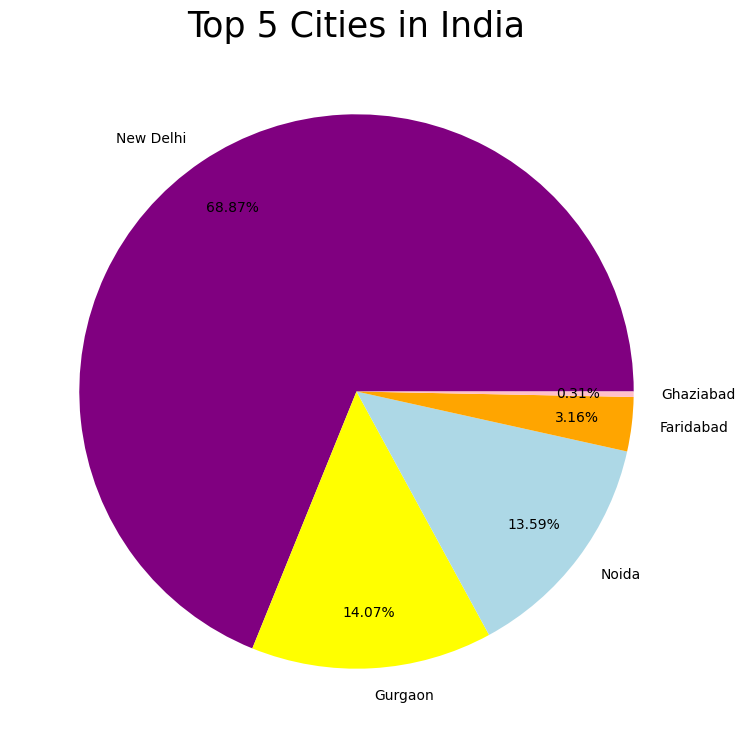

In [18]:
plt.figure(figsize=(9,9))
color = [ 'purple', 'yellow', 'lightblue', 'orange', 'pink']
plt.pie(x = city_val[:5], labels = city_names[:5], autopct = '%1.2f%%', pctdistance = 0.8, colors = color)
plt.title('Top 5 Cities in India', fontsize = 25)
plt.show()

Observation:- In India, the top 5 cities where the maximum orders were placed
1. New Delhi --> 68.87%
2. Gurgaon --> 14.07%
3. Noida --> 13.59%
4. Faridabad --> 3.16%
5. Ghaziabad --> 0.31%

Of the India's total no. of orders in top 5 cities, 68.87% are placed from New Delhi.
It clearly shows that New Delhi is the largest market for Zomato.

## The 3 most famous restaurants for the top city of India - New Delhi

In [19]:
india_data = df[df['Country'] == 'India']

In [20]:
# create new dataframe of New Delhi records
new_delhi = india_data[india_data['City'] == 'New Delhi']
new_delhi.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
2560,18287358,Food Cloud,1,New Delhi,"Aaya Nagar, New Delhi",Aaya Nagar,Cuisine Varies,500,Indian Rupees(Rs.),No,No,No,No,2,0.0,White,Not rated,2,India
2561,18216944,Burger.in,1,New Delhi,"84, Near Honda Showroom, Adchini, New Delhi",Adchini,Fast Food,350,Indian Rupees(Rs.),No,Yes,No,No,1,3.2,Orange,Average,46,India
2562,313333,Days of the Raj,1,New Delhi,"81/3, 1st Floor, Qutub Residency, Adchini, New...",Adchini,"North Indian, Seafood, Continental",1500,Indian Rupees(Rs.),Yes,Yes,No,No,3,3.4,Orange,Average,45,India


In [21]:
new_delhi['Restaurant Name'].value_counts()

Restaurant Name
Cafe Coffee Day                          57
Domino's Pizza                           55
Subway                                   38
Green Chick Chop                         37
McDonald's                               33
                                         ..
Pradhan Ji Multi Cuisine Restaurant       1
Shiva Coffee & South Indian Fast Food     1
The Ice Cafe                              1
Trending Eats                             1
Zareen's Dastarkhwan                      1
Name: count, Length: 4295, dtype: int64

In [22]:
new_delhi_val = new_delhi['Restaurant Name'].value_counts().values
new_delhi_names = new_delhi['Restaurant Name'].value_counts().index

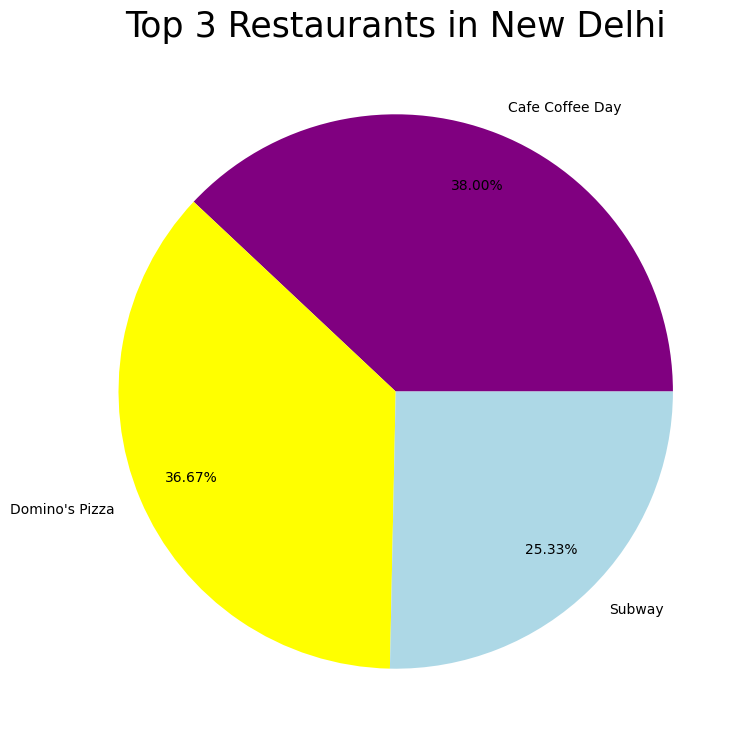

In [23]:
plt.figure(figsize=(9,9))
color = [ 'purple', 'yellow', 'lightblue', 'orange', 'pink']
plt.pie(x = new_delhi_val[:3], labels = new_delhi_names[:3], autopct = '%1.2f%%', pctdistance = 0.8, colors = color)
plt.title('Top 3 Restaurants in New Delhi', fontsize = 25)
plt.show()

Observation:- In New Delhi, the top 3 Restaurants are:
1. Cafe Coffee Day --> 38.00%
2. Domino's Pizza --> 36.67
3. Subway --> 25.33%

## Which Countries allow online delivery

In [24]:
df2 = df.groupby(['Country', 'Has Online delivery']).size().reset_index()
df2

,Country,Has Online delivery,0
0,Australia,No,24
1,Brazil,No,60
2,Canada,No,4
3,India,No,6229
4,India,Yes,2423
5,Indonesia,No,21
6,New Zealand,No,40
7,Phillipines,No,22
8,Qatar,No,20
9,Singapore,No,20


In [25]:
df2[df2['Has Online delivery'] == 'Yes']

,Country,Has Online delivery,0
4,India,Yes,2423
14,UAE,Yes,28


It can be clearly seen that only in India (in some parts) and UAE, Zomato has online delivery.
It may be due to strong network of restaurants and the profitability in these two countries.

## The top 5 expensive restaurants (on the basis of the average of Average Cost for two in rupees for each restaurant)

In [26]:
# df['Average Cost for two in rupees'] = df['Average Cost for two']*df['Currency']
# df
df['Restaurant Name'].nunique()

7446

In [27]:
df[df['Currency'] == 'Dollar($)'].head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
82,17284404,Austin's BBQ and Oyster Bar,216,Albany,"2820 Meredyth Dr, Albany, GA 31707",Albany,"BBQ, Burger, Seafood",25,Dollar($),No,No,No,No,2,3.3,Orange,Average,35,United States
83,17284203,BJ's Country Buffet,216,Albany,"2401 Dawson Rd, Albany, GA 31707",Albany,"American, BBQ",10,Dollar($),No,No,No,No,1,3.3,Orange,Average,25,United States


In [28]:
df['Currency'].value_counts().index

Index(['Indian Rupees(Rs.)', 'Dollar($)', 'Pounds(£)', 'Brazilian Real(R$)',
       'Emirati Diram(AED)', 'Rand(R)', 'NewZealand($)', 'Turkish Lira(TL)',
       'Botswana Pula(P)', 'Indonesian Rupiah(IDR)', 'Qatari Rial(QR)',
       'Sri Lankan Rupee(LKR)'],
      dtype='object', name='Currency')

In [29]:
# Dictionary with keys - names of currencies and values - exchange rate to rupees
currency_exchange_rate = {'Indian Rupees(Rs.)' : 1, 
                          'Dollar($)' : 83.17, 
                          'Pounds(£)' : 105.47, 
                          'Brazilian Real(R$)' : 16.98,
                          'Emirati Diram(AED)' : 22.65, 
                          'Rand(R)' : 4.49, 
                          'NewZealand($)' : 51.83,
                          'Turkish Lira(TL)' : 2.86,
                          'Botswana Pula(P)' : 6.17, 
                          'Indonesian Rupiah(IDR)' : 0.0054, 
                          'Qatari Rial(QR)' : 22.81,
                          'Sri Lankan Rupee(LKR)' : 0.25}

In [30]:
df['Currency'].replace(currency_exchange_rate, inplace = True)
df.rename(columns = {'Currency':'Currency Exchange Rate to Rupees'}, inplace = True)
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Cuisines,Average Cost for two,Currency Exchange Rate to Rupees,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","French, Japanese, Desserts",1100,6.17,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City",Japanese,1200,6.17,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Seafood, Asian, Filipino, Indian",4000,6.17,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","Japanese, Sushi",1500,6.17,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","Japanese, Korean",1500,6.17,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,Turkish,80,2.86,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"World Cuisine, Patisserie, Cafe",105,2.86,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Italian, World Cuisine",170,2.86,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,Restaurant Cafe,120,2.86,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [31]:
df['Average Cost for two in rupees'] = df['Average Cost for two']*df['Currency Exchange Rate to Rupees']
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Cuisines,Average Cost for two,Currency Exchange Rate to Rupees,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,Average Cost for two in rupees
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","French, Japanese, Desserts",1100,6.17,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines,6787.0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City",Japanese,1200,6.17,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines,7404.0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Seafood, Asian, Filipino, Indian",4000,6.17,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines,24680.0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","Japanese, Sushi",1500,6.17,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines,9255.0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","Japanese, Korean",1500,6.17,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines,9255.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,Turkish,80,2.86,No,No,No,No,3,4.1,Green,Very Good,788,Turkey,228.8
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"World Cuisine, Patisserie, Cafe",105,2.86,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey,300.3
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Italian, World Cuisine",170,2.86,No,No,No,No,4,3.7,Yellow,Good,661,Turkey,486.2
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,Restaurant Cafe,120,2.86,No,No,No,No,4,4.0,Green,Very Good,901,Turkey,343.2


In [32]:
df.drop(columns = ['Average Cost for two', 'Currency Exchange Rate to Rupees'], inplace = True)

In [33]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Cuisines,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,Average Cost for two in rupees
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","French, Japanese, Desserts",Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines,6787.0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City",Japanese,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines,7404.0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Seafood, Asian, Filipino, Indian",Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines,24680.0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","Japanese, Sushi",No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines,9255.0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","Japanese, Korean",Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines,9255.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,Turkish,No,No,No,No,3,4.1,Green,Very Good,788,Turkey,228.8
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"World Cuisine, Patisserie, Cafe",No,No,No,No,3,4.2,Green,Very Good,1034,Turkey,300.3
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Italian, World Cuisine",No,No,No,No,4,3.7,Yellow,Good,661,Turkey,486.2
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,Restaurant Cafe,No,No,No,No,4,4.0,Green,Very Good,901,Turkey,343.2


In [34]:
df['Restaurant ID'].nunique()
# Every record of the dataset is of a different restaurant.

9551

In [35]:
# top 3 expensive restaurants
df.loc[:, ['Average Cost for two in rupees', 'Restaurant Name']].sort_values(by = 'Average Cost for two in rupees', ascending = False)[:3]

,Average Cost for two in rupees,Restaurant Name
458,41585.0,Restaurant Andre
8,37020.0,Spiral - Sofitel Philippine Plaza Manila
460,35763.1,Jaan


Therefore, the top 3 expensive Restaurants:- 
Restaurant Andre,
Spiral - Sofitel Philippine Plaza Manila,
Jaan
